# Problem 3

In [1]:
%matplotlib inline
import random

In [2]:
def drawing_without_replacement_sim(numTrials):
    '''
    Runs numTrials trials of a Monte Carlo simulation
    of drawing 3 balls out of a bucket containing
    4 red and 4 green balls. Balls are not replaced once
    drawn. Returns a float - the fraction of times 3 
    balls of the same color were drawn in the first 3 draws.
    '''
    import random
    bucket = [1,1,1,1,2,2,2,2]
    result = 0
    for i in range(numTrials):
        draw = random.sample(bucket,3)
        if len(set(draw)) == 1:
            result += 1
    return result/numTrials

In [3]:
drawing_without_replacement_sim(100000)

0.1433

# Problem 4-1

In [4]:
import pylab

In [5]:
def makeHistogram(values, numBins, xLabel, yLabel, title=None):
    """
      - values, a list of numbers
      - numBins, a positive int
      - xLabel, yLabel, title, are strings
      - Produces a histogram of values with numBins bins and the indicated labels
        for the x and y axes
      - If title is provided by caller, puts that title on the figure and otherwise
        does not title the figure
    """
    if title !=None:
        pylab.title(title)
    pylab.hist(values, numBins)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.show()

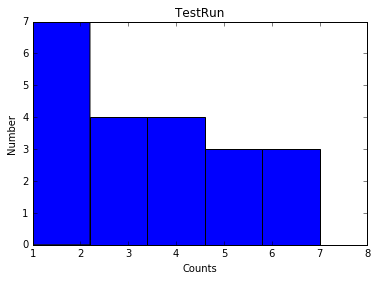

In [6]:
data = [1,2,3,4,5,4,3,2,1,2,3,4,5,6,7,6,5,4,3,2,1]
makeHistogram(data, 5, 'Counts', 'Number', 'TestRun')

# Problem 4-2

In [7]:
import random, pylab

# You are given this function
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

# You are given this class
class Die(object):
    def __init__(self, valList):
        """ valList is not empty """
        self.possibleVals = valList[:]
    def roll(self):
        return random.choice(self.possibleVals)

In [8]:
# Implement this -- Coding Part 2 of 2
def getAverage(die, numRolls, numTrials):
    """
      - die, a Die
      - numRolls, numTrials, are positive ints
      - Calculates the expected mean value of the longest run of a number
        over numTrials runs of numRolls rolls.
      - Calls makeHistogram to produce a histogram of the longest runs for all
        the trials. There should be 10 bins in the histogram
      - Choose appropriate labels for the x and y axes.
      - Returns the mean calculated
    """
    popLongestRuns = []
    for trial in range(numTrials):
        longestRun = 1
        currentRun = 1
        allRolls = []
        for roll in range(numRolls):
            allRolls.append(die.roll())
        # Check for longest run
        for idx, entry in enumerate(allRolls):
            try:
                if allRolls[idx] == allRolls[idx+1]:
                    currentRun += 1
                else:
                    currentRun = 1
            except IndexError:
                pass
            if currentRun > longestRun:
                longestRun = currentRun
        popLongestRuns.append(longestRun)
    makeHistogram(popLongestRuns, 10, 'Longest Runs', 'Counts', 'Histogram of Longest Runs')
    popMean, popStd = getMeanAndStd(popLongestRuns)
    return round(popMean, 3)

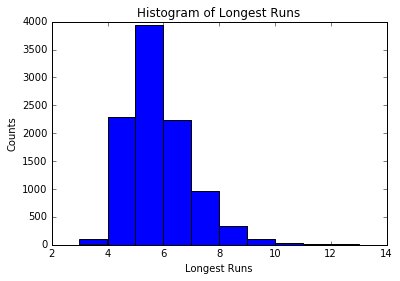

5.335


In [9]:
print(getAverage(Die([1,2,3,4,5,6,6,6,7]), 500, 10000))

# Problem 6

In [10]:
# generate all combinations of N items
def powerSet(items):
    N = len(items)
    # enumerate the 2**N possible combinations
    for i in range(2**N):
        combo = []
        for j in range(N):
            # test bit jth of integer i
            if (i >> j) % 2 == 1:
                combo.append(items[j])
        yield combo

In [41]:
def find_combination(choices, total):
    """
    choices: a non-empty list of ints
    total: a positive int
 
    Returns result, a numpy.array of length len(choices) 
    such that
        * each element of result is 0 or 1
        * sum(result*choices) == total
        * sum(result) is as small as possible
    In case of ties, returns any result that works.
    If there is no result that gives the exact total, 
    pick the one that gives sum(result*choices) closest 
    to total without going over.
    """
    import numpy as np
    workingChoices = choices[:]
    combos = powerSet(choices)
    powerSetDict = {}
    greatest = []
    for entry in combos:
        if sum(entry) <= total:
            try:
                powerSetDict[sum(entry)].append(entry)
            except KeyError:
                powerSetDict[sum(entry)] = [entry]
    for entry in powerSetDict:
        powerSetDict[entry].sort(reverse=True)
    indexList = powerSetDict[max(powerSetDict)][0]
    for idx, entry in enumerate(workingChoices):
        if entry in indexList:
            workingChoices[idx] = 1
            indexList.remove(entry)
        else:
            workingChoices[idx] = 0
    return np.array(workingChoices)

In [43]:
find_combination([4, 10, 3, 5, 8], 1)

array([0, 0, 0, 0, 0])

In [44]:
find_combination([1, 81, 3, 102, 450, 10], 9)

array([1, 0, 1, 0, 0, 0])

In [45]:
find_combination([1], 10)

array([1])